# Import Library

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_train_history(train_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(train_history.history['acc'], label='train')
    ax1.plot(train_history.history['val_acc'], label='validation')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    ax2.plot(train_history.history['loss'], label='train')
    ax2.plot(train_history.history['val_loss'], label='validation')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

def build_model():
    model = Sequential()
    #卷積層1
    model.add(Conv2D(filters=32, kernel_size=(3,3),
                     input_shape=(32, 32, 3), 
                     activation='relu', 
                     padding='same'))
    model.add(Dropout(rate=0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #卷積層2與池化層2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                     activation='relu', padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #建立神經網路(平坦層、隱藏層、輸出層)
    model.add(Flatten())
    model.add(Dropout(rate=0.25))

    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate=0.25))

    model.add(Dense(10, activation='softmax'))

    return model

#檢查model 的STACK
model = build_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 145s 4ms/step - loss: 1.8113 - acc: 0.3438 - val_loss: 1.6069 - val_acc: 0.4573
Epoch 2/10
40000/40000 [==============================] - 134s 3ms/step - loss: 1.4454 - acc: 0.4803 - val_loss: 1.3814 - val_acc: 0.5393
Epoch 3/10
40000/40000 [==============================] - 130s 3ms/step - loss: 1.2943 - acc: 0.5377 - val_loss: 1.3064 - val_acc: 0.5838
Epoch 4/10
40000/40000 [==============================] - 132s 3ms/step - loss: 1.1894 - acc: 0.5784 - val_loss: 1.2136 - val_acc: 0.6117
Epoch 5/10
40000/40000 [==============================] - 129s 3ms/step - loss: 1.1025 - acc: 0.6087 - val_loss: 1.1466 - val_acc: 0.6304
Epoch 6/10
40000/40000 [==============================] - 126s 3ms/step - loss: 1.0347 - acc: 0.6351 - val_loss: 1.1023 - val_acc: 0.6358
Epoch 7/10
40000/40000 [==============================] - 123s 3ms/step - loss: 0.9720 - acc: 0.6558 - val_loss: 1.0583 - 

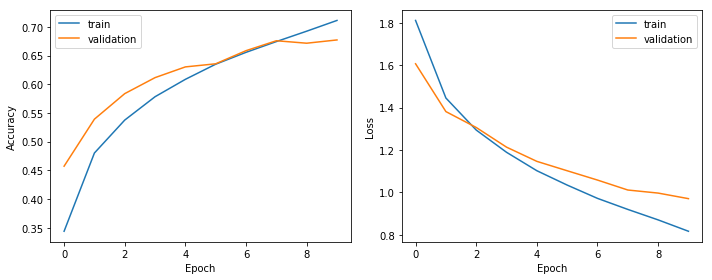

In [9]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

show_train_history(history)

# 載入之前訓練的模型

In [ ]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 130s 3ms/step - loss: 0.0898 - acc: 0.1253 - val_loss: 0.0894 - val_acc: 0.1957
Epoch 2/10
40000/40000 [==============================] - 133s 3ms/step - loss: 0.0890 - acc: 0.1641 - val_loss: 0.0888 - val_acc: 0.2345
Epoch 3/10
40000/40000 [==============================] - 138s 3ms/step - loss: 0.0879 - acc: 0.1949 - val_loss: 0.0877 - val_acc: 0.2570
Epoch 4/10
40000/40000 [==============================] - 129s 3ms/step - loss: 0.0863 - acc: 0.2279 - val_loss: 0.0861 - val_acc: 0.2800
Epoch 5/10
40000/40000 [==============================] - 131s 3ms/step - loss: 0.0842 - acc: 0.2632 - val_loss: 0.0844 - val_acc: 0.3123
Epoch 6/10
40000/40000 [==============================] - 139s 3ms/step - loss: 0.0824 - acc: 0.2938 - val_loss: 0.0831 - val_acc: 0.3308
Epoch 7/10
40000/40000 [==============================] - 132s 3ms/step - loss: 0.0810 - acc: 0.3137 - val_loss: 0.0818 - 

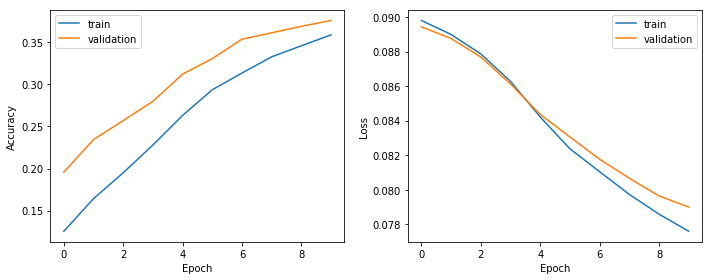

In [10]:
model = build_model()
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

show_train_history(history)


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 155s 4ms/step - loss: 0.3085 - acc: 0.9001 - val_loss: 0.2948 - val_acc: 0.9000
Epoch 2/10
40000/40000 [==============================] - 126s 3ms/step - loss: 0.2825 - acc: 0.9010 - val_loss: 0.2820 - val_acc: 0.9002
Epoch 3/10
40000/40000 [==============================] - 135s 3ms/step - loss: 0.2680 - acc: 0.9029 - val_loss: 0.2683 - val_acc: 0.9011
Epoch 4/10
40000/40000 [==============================] - 127s 3ms/step - loss: 0.2560 - acc: 0.9050 - val_loss: 0.2587 - val_acc: 0.9018
Epoch 5/10
40000/40000 [==============================] - 131s 3ms/step - loss: 0.2468 - acc: 0.9070 - val_loss: 0.2495 - val_acc: 0.9037
Epoch 6/10
40000/40000 [==============================] - 126s 3ms/step - loss: 0.2398 - acc: 0.9087 - val_loss: 0.2432 - val_acc: 0.9055
Epoch 7/10
40000/40000 [==============================] - 122s 3ms/step - loss: 0.2337 - acc: 0.9101 - val_loss: 0.2380 - 

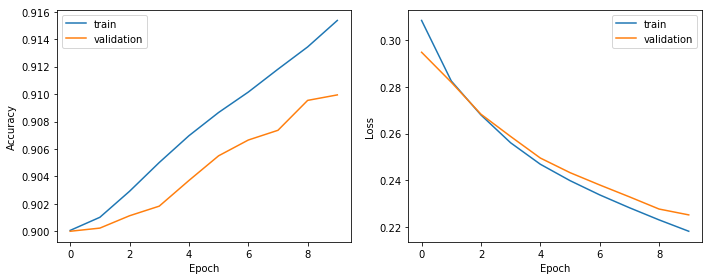

In [11]:
model = build_model()
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

show_train_history(history)